Features examples
   alcohol  malic_acid
0    14.23        1.71
1    13.20        1.78
2    13.16        2.36
3    14.37        1.95
4    13.24        2.59


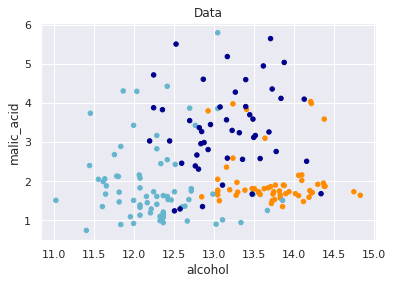

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

data = load_wine()

X = data.data[:, :2]
y = data.target
m = len(y)
x_names = data.feature_names[:2]
y_names = data.target_names

X_df = pd.DataFrame(X, columns = x_names)

print("Features examples")
print(X_df.head())

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.title("Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

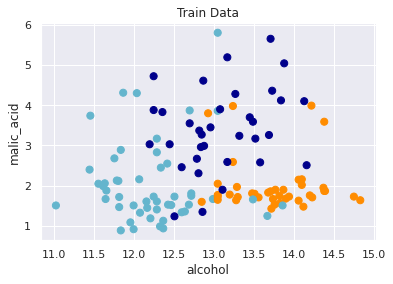

In [2]:
from sklearn.model_selection import train_test_split

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

m_train = len(y_train)
m_test = len(y_test)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=50)
plt.title("Train Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

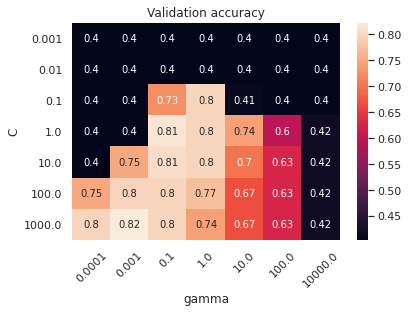

Best parameters:
C: 1000.0	- gamma: 0.001


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Model training and 5-fold cross-validation with grid search of gamma and C

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_values = [0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 10000.0]
models = [[] for i in range(len(C_values))]
scores = [[] for i in range(len(C_values))]

for i in range(len(C_values)):
  for j in range(len(gamma_values)):
    models[i].append(make_pipeline(StandardScaler(), SVC(C=C_values[i], gamma=gamma_values[j])))
    scores[i].append(cross_val_score(models[i][j], X_train, y_train, cv=5).mean())

sns.heatmap(scores, annot=True, xticklabels=gamma_values, yticklabels=C_values)
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Validation accuracy')
plt.xticks(rotation=45)
plt.show()

max_score = max([max(l) for l in scores])
max_score_list = []
for i in range(len(C_values)):
    for j in range(len(gamma_values)):
      if scores[i][j]==max_score:
        max_score_list.append((i,j))
print("Best parameters:")
for t in max_score_list:
  print("C: {}\t- gamma: {}".format(C_values[t[0]], gamma_values[t[1]]))

C: 1000.0 - gamma: 0.001 - accuracy: 74.07%


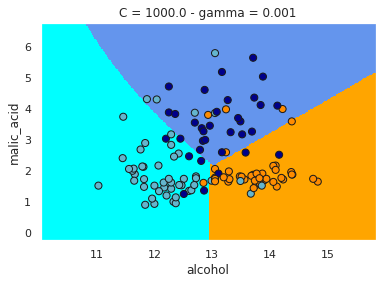

In [10]:
# Best model evaluation

C = C_values[max_score_list[0][0]]
gamma = gamma_values[max_score_list[0][1]]

best_svm = make_pipeline(StandardScaler(), SVC(C=C, gamma=gamma))
best_svm.fit(X_train, y_train)
acc = best_svm.score(X_test, y_test)
print("C: {} - gamma: {} - accuracy: {:.2f}%".format(C, gamma, acc*100))

#Plot
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.title("C = {} - gamma = {}".format(C, gamma))
plt.show()